In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
os.getcwd()

'C:\\Users\\LEGION\\Desktop\\data_set'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'hypothesis_tests.ipynb',
 'insurance.csv',
 'insuran_analysis.ipynb',
 'titanic test.csv',
 'titanic_train.csv',
 'Untitled.ipynb']

In [4]:
titanic = pd.read_csv('titanic test.csv')

In [5]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
nn_df = titanic.select_dtypes(exclude = np.number)
nn_df.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
np.median(titanic['Fare'])

nan

In [10]:
np.nanmedian(titanic['Fare'])

14.4542

In [11]:
titanic['Fare'].fillna(np.nanmedian(titanic['Fare']),inplace =True)
titanic['Fare'].isnull().sum()

0

In [12]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Tests
- one continous
- one categorical
- two categorical
- two continous
- one continous one categorical(t-test)
- one continous one categorical(Annova)

### One continuous

<AxesSubplot:xlabel='Fare', ylabel='Density'>

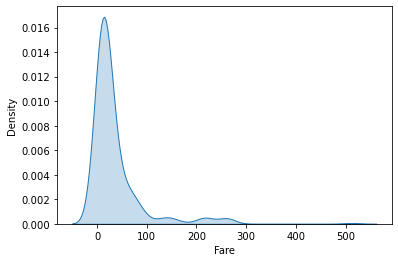

In [13]:
sns.kdeplot(x = titanic.Fare,fill =True)

Find the interval of population given aplha = 0.05

#### Method 1 (manual)

In [14]:
len(titanic.Fare)

418

In [15]:
t = stats.t.ppf(q=0.975,df = 417)
print(t)
std = np.std(titanic.Fare)
print(std)
sqrt = np.sqrt(len(titanic.Fare))
print(sqrt)

1.965669151283938
55.783256347325455
20.445048300260872


In [16]:
tuples = (np.mean(titanic.Fare)-(t*std/sqrt),np.mean(titanic.Fare)+(t*std/sqrt))
tuples

(30.213308842019668, 40.93976197137739)

#### Method 2 (using library)

In [17]:
interval= stats.t.interval(0.95,df = 417,loc = titanic.Fare.mean(),scale = std/sqrt)
interval

(30.213308842019668, 40.93976197137739)

In [18]:
interval_z = stats.norm.interval(0.95,loc = titanic.Fare.mean(),scale = std/sqrt)
interval_z

(30.228875094263458, 40.92419571913361)

### one categorical

<AxesSubplot:>

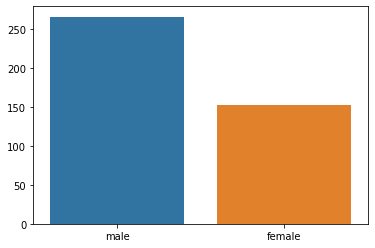

In [19]:
sns.barplot(x=titanic.Sex.value_counts().index,y=titanic.Sex.value_counts().values)

The test Used here is Chi-squared test

In [20]:
stats.chisquare(f_obs = titanic.Sex.value_counts())

Power_divergenceResult(statistic=31.09090909090909, pvalue=2.4622186759083766e-08)

In [21]:
crit_statistic = stats.chi2.ppf(q=0.95,df=1)
crit_statistic

3.841458820694124

Our test statistic is much larger than critical hence reject the null hypothesis.where

H0 : there is no difference due to categories

H1 : There is a difference due to categories


#### Typical Chi-Square distribution for 1 dof

(0.0, 11.71822390691517)

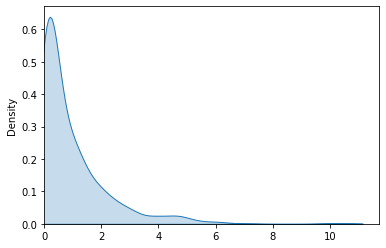

In [22]:
x=stats.chi2.rvs(size = 1000,df = 1)
pl = sns.kdeplot(x=x,fill = True,cut = True)
pl.set_xlim(left =0)

### Two categorical variable

H0 : There is no relationship b/w the categories

H1 : There is a relationship b/w the categories

In [23]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Passenger class here is taken as category

In [24]:
titanic.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [25]:
titanic.Pclass = pd.Categorical(titanic.Pclass)

In [26]:
titanic['Pclass'] = titanic['Pclass'].cat.rename_categories(['A','B','C'])
frq_tble = pd.crosstab(index =titanic.Sex,columns = titanic.Pclass)
frq_tble

Pclass,A,B,C
Sex,,,
female,50,30,72
male,57,63,146


 #### Method 1 Using scipy.stats library

In [27]:
observed = frq_tble.values

In [28]:
val = stats.chi2_contingency(frq_tble)

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

Since pvalue is less than 0.05 therefore we reject null hypothesis.

In [29]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex'>

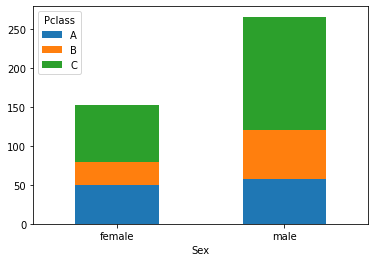

In [30]:
frq_tble.plot(kind = 'bar',stacked = True,rot = 0)

### Two continous

In [31]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Age and Fare are two choosen continous variable

#### Method 1

In [32]:
titanic[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.332709
Fare,0.332709,1.000000


#### Method 2

In [33]:
np.corrcoef(titanic['Age'],titanic['Fare'])

array([[nan, nan],
       [nan,  1.]])

In [34]:
c = titanic.Age.fillna(np.mean(titanic.Age))
np.corrcoef(titanic.Fare,c)

array([[1.        , 0.32456842],
       [0.32456842, 1.        ]])

### one continous and one categorical (two - sample t-test)

In [35]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Fare choosen as continous variable and sex is choosen as categorical variable

In [36]:
cat_con = titanic[['Fare','Sex']]
cat_con 

,Fare,Sex
0,7.8292,male
1,7.0000,female
2,9.6875,male
3,8.6625,male
4,12.2875,female
...,...,...
413,8.0500,male
414,108.9000,female
415,7.2500,male
416,8.0500,male


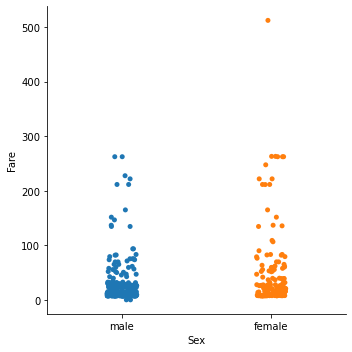

In [37]:
sns.catplot(x='Sex',y='Fare',data = cat_con)

#### Method 1 using scipy library

H0 : (mean)MALE = (mean)FEMALE

H1 : (mean)MALE != (mean)FEMALE

In [38]:
a= cat_con[cat_con.Sex == 'male'].Fare
b = cat_con[cat_con.Sex == 'female'].Fare

In [39]:
stats.ttest_ind(a= a, b= b,equal_var = False)

Ttest_indResult(statistic=-3.4573877036507663, pvalue=0.0006622966209586439)

Pvalue is much less than significance level therefore we reject null and accept alternate hypothesis. which implies there is difference due categories
even in the population

#### Theoritical Method

In [40]:
x1 = cat_con[cat_con.Sex == 'male'].Fare
sx = len(x1)
y1 = cat_con[cat_con.Sex == 'female'].Fare
sy = len(y1)
print(sx)
print(sy)

266
152


In [41]:
x1_m = x1.mean()
y1_m = y1.mean()
sqrt = np.sqrt((np.var(x1)/sx) + (np.var(y1)/sy))

In [42]:
t = (x1_m - y1_m)/sqrt
t

-3.4680671459410393

In [43]:
pvalue_cal = stats.t.cdf(x=t,df =sy-1 )*2
pvalue_cal

0.000683172711515983

df is smaller sample size subtacted by 1 

### ANNOVA

In [44]:
cat3_n_cont = titanic[['Fare','Pclass']]
cat3_n_cont

,Fare,Pclass
0,7.8292,C
1,7.0000,C
2,9.6875,B
3,8.6625,C
4,12.2875,C
...,...,...
413,8.0500,C
414,108.9000,A
415,7.2500,C
416,8.0500,C


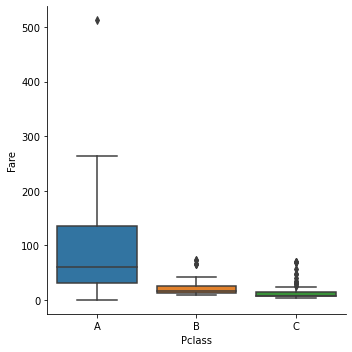

In [45]:
sns.catplot(data = cat3_n_cont,x='Pclass',y = 'Fare',kind = 'box')

In [46]:
groups_ind = cat3_n_cont.groupby('Pclass').groups
catA = cat3_n_cont['Fare'].iloc[groups_ind['A']]
catB = cat3_n_cont['Fare'].iloc[groups_ind['B']]
catC = cat3_n_cont['Fare'].iloc[groups_ind['C']]

In [47]:
stats.f_oneway(catA,catB,catC)

F_onewayResult(statistic=130.32013425445123, pvalue=1.19952265501301e-44)

P value is too low indicating that are we should reject null hypothesis and therefore have to accept alternate hyothesis.
Indicating that there is difference b/w means of each group

<AxesSubplot:xlabel='Fare', ylabel='Density'>

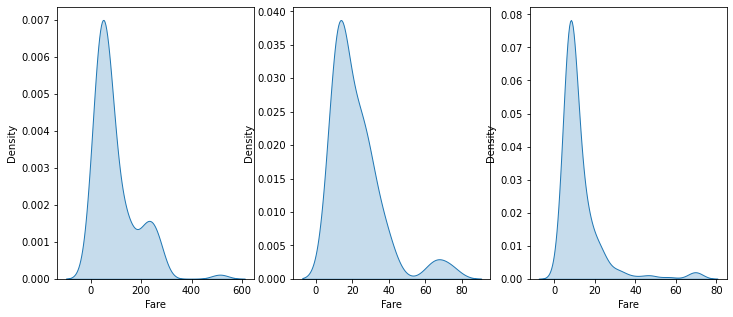

In [48]:
fig,ax = plt.subplots(1,3,figsize = (12,5))
sns.kdeplot(x = catA,ax =ax[0],fill =True)
sns.kdeplot(x = catB,ax =ax[1],fill =True)
sns.kdeplot(x = catC,ax =ax[2],fill = True)

lets check which category caused this variation.

In [49]:
categories = ['A','B','C']
pairs = []

for i in range(2):
    for k in range(i+1,3):
        pairs.append((categories[i],categories[k]))

for p1,p2 in pairs:
    print(p1,p2)
    print(stats.ttest_ind(cat3_n_cont['Fare'].iloc[groups_ind[p1]],cat3_n_cont['Fare'].iloc[groups_ind[p2]]))

A B
Ttest_indResult(statistic=8.133180619559417, pvalue=4.511428412153624e-14)
A C
Ttest_indResult(statistic=14.09570903318974, pvalue=1.693147914876138e-35)
B C
Ttest_indResult(statistic=6.644352200466072, pvalue=1.3747778950099317e-10)


Pairwise two sample t-test suggest that each and every category are different from each other, Which we can clearly see in above plotted kde 

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-72.0782,0.0,-86.7094,-57.4469,True
A,C,-81.8115,0.0,-93.9935,-69.6294,True
B,C,-9.7333,0.1738,-22.5156,3.0491,False


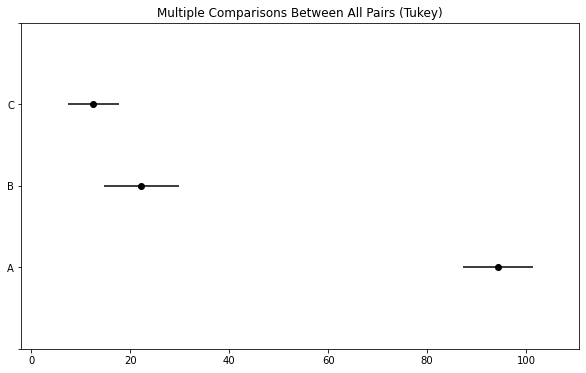

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog =cat3_n_cont['Fare'], groups = cat3_n_cont['Pclass'],alpha =0.05 )
tukey.plot_simultaneous()

tukey.summary()

Above we can clearly see that each test involving A show that we should reject the null hypothesis. This suggest that A category is likely different from the other two.